# 프로야구선수 연봉 예측 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [5]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

## 데이터 확인 

In [6]:
pich = pd.read_csv("./data/picher_stats_2017.csv")
pich.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [7]:
pich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [8]:
pich.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


- 표준편차 차이가 심해서 단위 맞춰주는게 좋음
- 연봉같은 경우는 만단위라서 표준편차 차이가 큰것

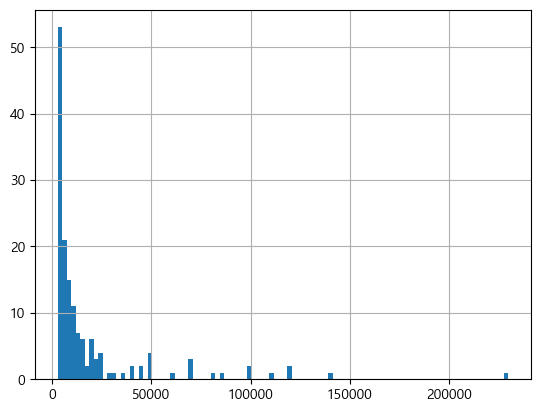

In [9]:
# 2018년 투수 연봉 분포 히스토그램
pich["연봉(2018)"].hist(bins = 100)
plt.show()

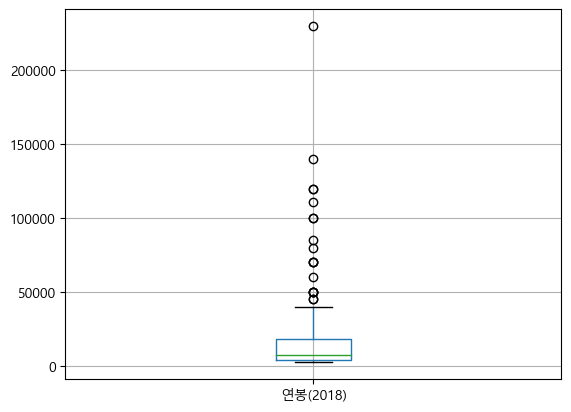

In [10]:
# 2018년 연봉의 상자 수염 그림 출력
pich.boxplot(column = ["연봉(2018)"])
plt.show()

- 종속변수 분석
    - 수십억의 연봉을 받는 프로야구선수는 많지 않으며, 5억원 미만의 연봉이 일반적임

In [11]:
# 선수명, 팀명과 같이 그래프로 표현할 수 없는 피처 제외하고 시각화
vis_pich = pich.iloc[:, 2:]
vis_pich.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [14]:
# 피처 각각에 대한 히스토그램을 출력
def plot_hist(df):
    plt.rcParams["figure.figsize"] = [20, 16]
    fig = plt.figure(1)
    
    # df의 열 개수 만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

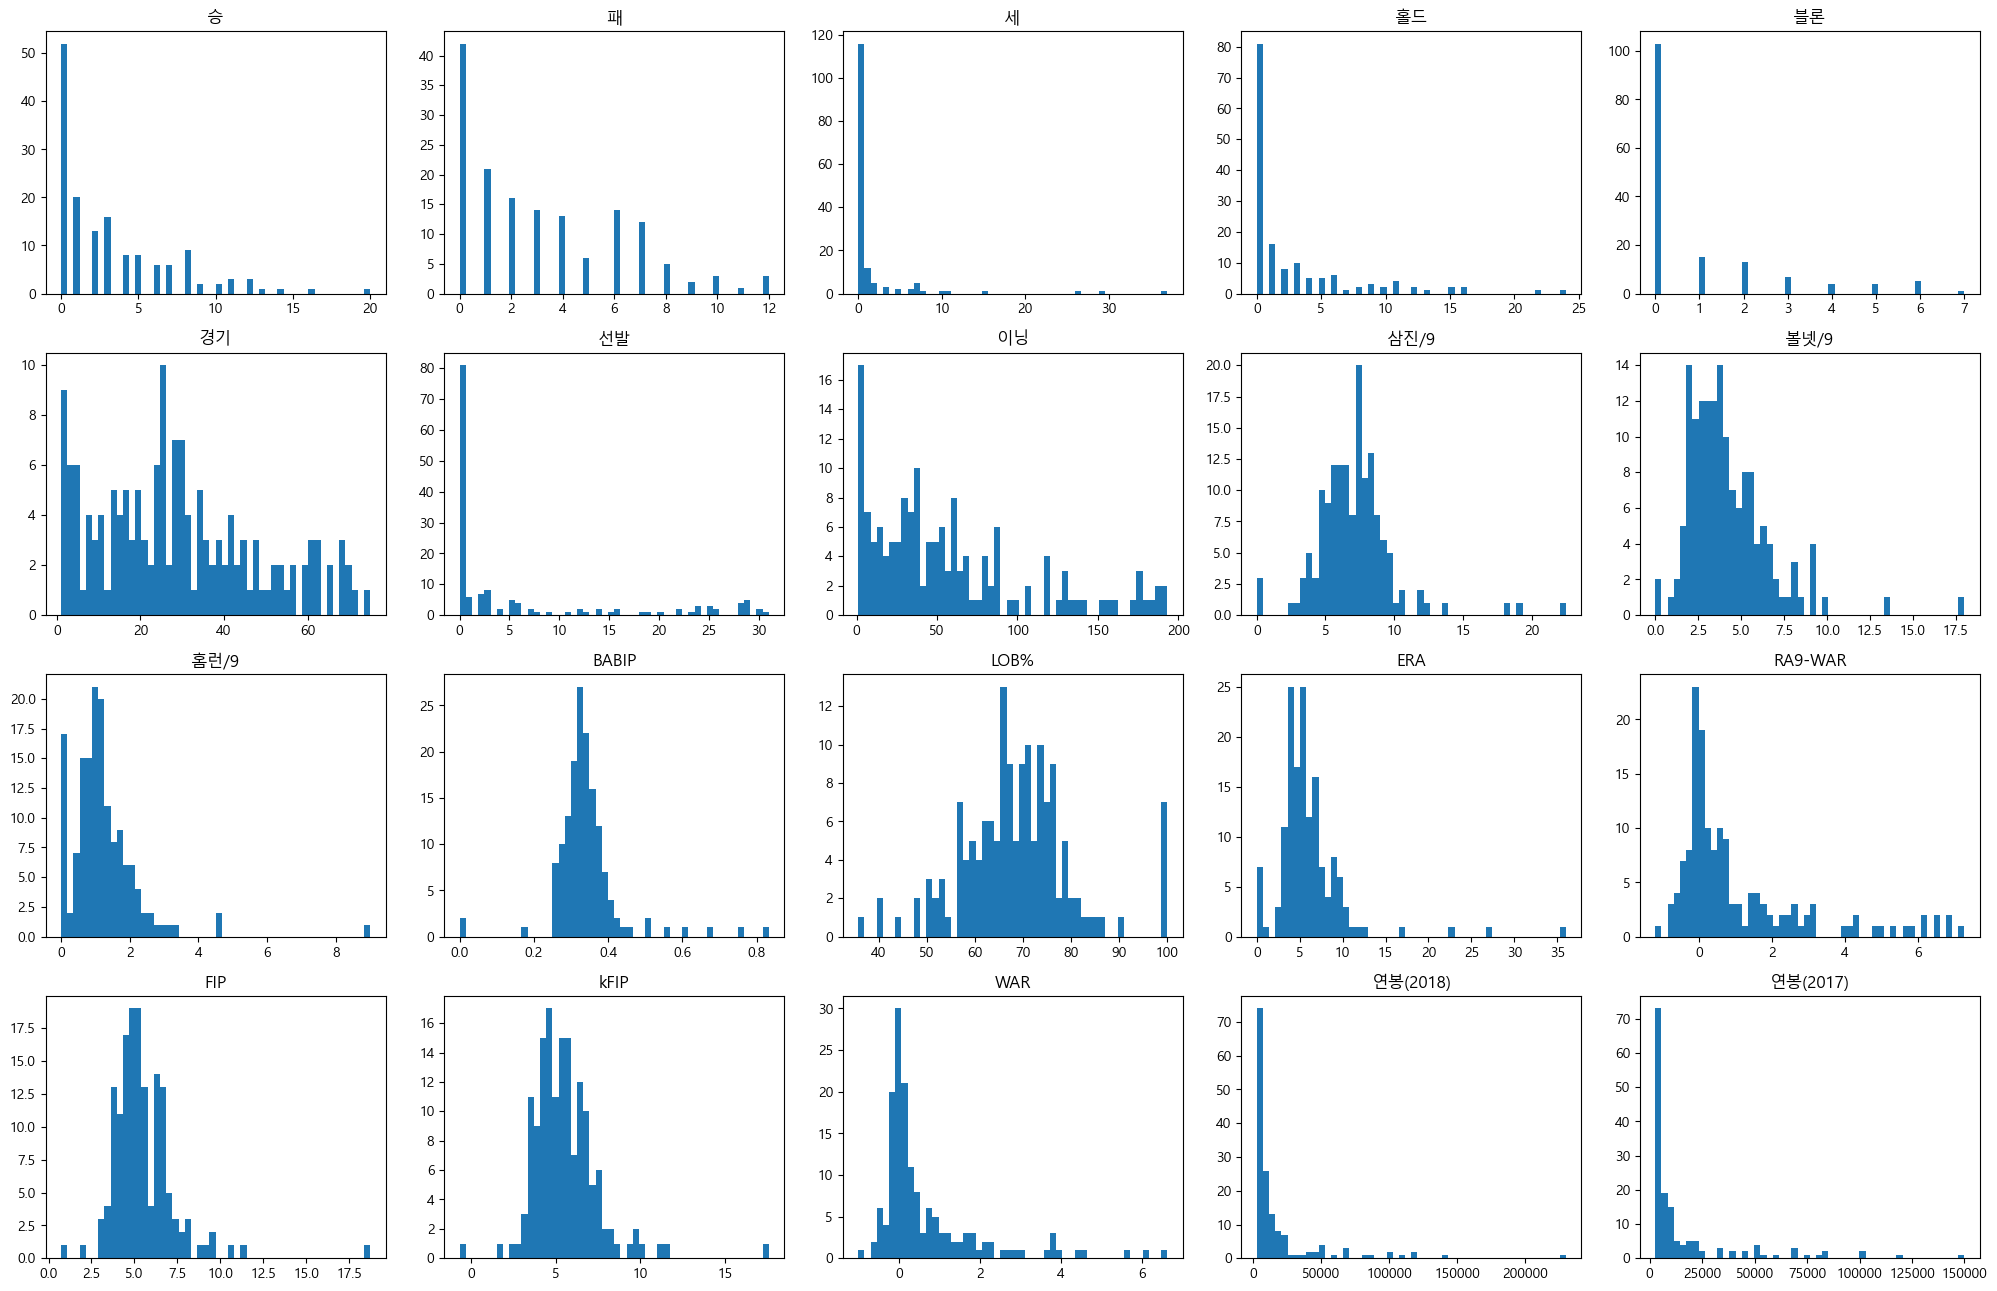

In [15]:
plot_hist(vis_pich)

- 매우 불균형한 분포를 가지고 있는 피처들이 많음
- 각 피처 간의 단위가 많이 다름
    - 스케일링이 필요함
        - 선형회귀도 단위가 큰 데이터의 영향을 크게 받을 수 있음

## 데이터 전처리

### 원핫인코딩 

In [16]:
pich["팀명"].unique()

array(['SK', 'LG', 'KIA', '롯데', 'KT', '두산', '삼성', '한화', 'NC'],
      dtype=object)

In [17]:
ohe = OneHotEncoder()

In [18]:
team_arr = np.array(pich["팀명"])

In [21]:
# 팀명 을 2차원 배열로 변환
team_arr = np.reshape(team_arr, (-1, 1))

In [23]:
team_name = ohe.fit_transform(team_arr)   # 일차원일땐 원핫인코딩 하기 힘듦 따라서 2차원으로 변환시켜준것

In [24]:
ohe.get_feature_names_out()

array(['x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데',
       'x0_삼성', 'x0_한화'], dtype=object)

In [25]:
team_name

<152x9 sparse matrix of type '<class 'numpy.float64'>'
	with 152 stored elements in Compressed Sparse Row format>

In [26]:
ohe_team_df = pd.DataFrame(team_name.toarray(), columns = ohe.get_feature_names_out())

In [27]:
ohe_team_df.head()

,x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- 데이터 크면 원핫인코딩, 작으면 겟더미

In [28]:
ohe_team_df.shape

(152, 9)

In [29]:
pich = pd.concat([pich, ohe_team_df], axis = 1)

In [30]:
pich.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,85000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,소사,LG,11,11,1,0,0,30,29,185.1,...,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,85000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
pich = pich.drop("팀명", axis = 1)

In [32]:
pich.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,켈리,16,7,0,0,0,30,30,190.0,8.95,...,85000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,소사,11,11,1,0,0,30,29,185.1,7.43,...,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,양현종,20,6,0,0,0,31,31,193.1,7.36,...,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,차우찬,10,7,0,0,0,28,28,175.2,8.04,...,100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,레일리,13,7,0,0,0,30,30,187.1,7.49,...,85000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 데이터 분할

In [33]:
x = pich.drop(["선수명", "연봉(2018)"], axis = 1)   # 종속변수가 연봉2018이라서 쟬 빼줬음
y = pich["연봉(2018)"]   # 종속변수

In [34]:
x.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,16,7,0,0,0,30,30,190.0,8.95,2.13,...,85000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11,11,1,0,0,30,29,185.1,7.43,1.85,...,50000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,6,0,0,0,31,31,193.1,7.36,2.09,...,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,7,0,0,0,28,28,175.2,8.04,1.95,...,100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,7,0,0,0,30,30,187.1,7.49,2.11,...,85000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [36]:
x_train.shape, x_test.shape

((121, 28), (31, 28))

### 스케일링

In [37]:
x_train.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
       'x0_KIA', 'x0_KT', 'x0_LG', 'x0_NC', 'x0_SK', 'x0_두산', 'x0_롯데', 'x0_삼성',
       'x0_한화'],
      dtype='object')

In [39]:
scale_col = x_train.columns[:19].tolist()

In [40]:
scale_col

['승',
 '패',
 '세',
 '홀드',
 '블론',
 '경기',
 '선발',
 '이닝',
 '삼진/9',
 '볼넷/9',
 '홈런/9',
 'BABIP',
 'LOB%',
 'ERA',
 'RA9-WAR',
 'FIP',
 'kFIP',
 'WAR',
 '연봉(2017)']

In [41]:
pich_ss = StandardScaler()
scaled_train = pich_ss.fit_transform(x_train[scale_col])
scaled_test = pich_ss.transform(x_test[scale_col])

In [42]:
scaled_test

array([[ 5.08583391e-01,  9.21630186e-01, -7.00593465e-02,
         1.54227660e-02,  6.38056885e-01,  5.12280483e-01,
         6.34314969e-01,  5.03089604e-01, -6.76610282e-01,
        -3.78209411e-01,  5.95994970e-01, -2.95723986e-01,
        -4.50528927e-01,  1.71750692e-01, -5.93257473e-01,
         5.78257881e-01,  6.20280586e-01, -9.00158530e-01,
        -3.49812266e-01],
       [-4.58183235e-02, -3.78862555e-01, -3.62375930e-01,
        -6.06628796e-01, -5.68269413e-01, -2.01373414e-01,
         5.29890328e-01,  5.45476409e-02, -8.00473516e-01,
         6.37619818e-01, -1.17539843e-01, -8.70318671e-01,
        -2.61988131e-01, -2.04931111e-02, -3.62657275e-01,
         6.30821842e-01,  7.55842143e-01, -9.24213119e-01,
        -5.44115918e-01],
       [ 2.44898939e+00,  1.89699974e+00, -3.62375930e-01,
        -6.06628796e-01, -5.68269413e-01, -4.84475786e-02,
         2.30510923e+00,  2.38858953e+00, -1.02335289e-01,
        -1.07862134e+00, -2.07893600e-02, -3.97123048e-01,
    

In [43]:
len(scaled_train), len(scaled_test)

(121, 31)

In [44]:
scaled_train = pd.DataFrame(scaled_train, columns = scale_col)
scaled_test = pd.DataFrame(scaled_test, columns = scale_col)

In [46]:
scaled_train.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,-0.600220,-0.703986,-0.070059,0.015423,0.638057,0.359355,-0.618781,-0.353402,1.016187,0.498465,-0.286853,0.357737,-0.810470,0.322202,-0.745116,-0.551867,-0.694077,-0.314830,-0.349812
1,-0.045818,0.596507,2.560790,1.881577,1.241220,1.735687,-0.618781,0.052518,0.700899,-0.266886,-0.661761,0.008473,-0.784760,-0.182089,-0.295165,-0.801546,-0.806063,0.246444,-0.349812
2,-0.877421,-1.029109,-0.362376,-0.606629,-0.568269,-1.424780,-0.618781,-1.124651,-2.620888,2.210068,-1.399484,-3.833425,2.703244,-1.669889,-0.559511,0.841078,1.268618,-0.539340,-0.561780
3,-0.877421,-1.029109,-0.362376,-0.606629,-0.568269,-1.271854,-0.618781,-1.080000,-0.777953,2.590424,1.563500,0.864732,0.115093,1.066102,-0.643877,2.634823,2.524036,-0.595467,-0.548532
4,-0.877421,-0.378863,-0.362376,0.015423,-0.568269,-0.150398,-0.618781,-0.452853,0.625830,-0.869889,0.825777,0.909798,-0.544799,0.740124,-0.705745,0.098612,-0.039845,-0.354921,-0.477876


In [47]:
scaled_train = pd.concat([scaled_train, x_train.iloc[:, 19:].reset_index(drop = True)],
                        axis = 1)
scaled_test = pd.concat([scaled_test, x_test.iloc[:, 19:].reset_index(drop = True)],
                        axis = 1)

In [48]:
scaled_train.shape, scaled_test.shape

((121, 28), (31, 28))

In [49]:
len(y_train), len(y_test)

(121, 31)

In [51]:
scaled_train.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),x0_KIA,x0_KT,x0_LG,x0_NC,x0_SK,x0_두산,x0_롯데,x0_삼성,x0_한화
0,-0.600220,-0.703986,-0.070059,0.015423,0.638057,0.359355,-0.618781,-0.353402,1.016187,0.498465,...,-0.349812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.045818,0.596507,2.560790,1.881577,1.241220,1.735687,-0.618781,0.052518,0.700899,-0.266886,...,-0.349812,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.877421,-1.029109,-0.362376,-0.606629,-0.568269,-1.424780,-0.618781,-1.124651,-2.620888,2.210068,...,-0.561780,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.877421,-1.029109,-0.362376,-0.606629,-0.568269,-1.271854,-0.618781,-1.080000,-0.777953,2.590424,...,-0.548532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.877421,-0.378863,-0.362376,0.015423,-0.568269,-0.150398,-0.618781,-0.452853,0.625830,-0.869889,...,-0.477876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 모델 훈련

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(scaled_train, y_train)

LinearRegression()

In [54]:
lr.coef_

array([  -159.41346162,    620.10418423,   -585.88846081,   -256.86590312,
          844.15356196,   -269.2521155 ,  -3585.2601276 ,   1389.11123179,
        -2663.55213535,     37.58976872,  -2071.25599106,   -572.45973597,
          738.34664537,   1176.40859022,   2584.80478824,  18149.24008396,
       -17114.26067506,   6314.69602789,  20340.42845838,  -1321.63251187,
         1840.06748702,  -1486.94891128,   -876.33876639,   2525.07572281,
        -3564.16152722,    824.71842004,    136.95201459,   1922.26807231])

In [55]:
lr.intercept_

17384.462716406808

## 모델 평가

In [57]:
lr.score(scaled_test, y_test)

0.854066987752523

In [58]:
pred = lr.predict(scaled_test)

In [59]:
mae = mean_absolute_error(y_test, pred)
mae

8516.291900078317

## 모델 최적화

In [61]:
# statsmodel 라이브러리로 회귀 분석
x = sm.add_constant(scaled_train)

In [62]:
model = sm.OLS(y_train.reset_index(drop = True), x)

In [63]:
model = model.fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     75.35
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           7.67e-52
Time:                        12:31:14   Log-Likelihood:                -1210.4
No. Observations:                 121   AIC:                             2477.
Df Residuals:                      93   BIC:                             2555.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.565e+04    505.745     30.937      0.000    1.46e+04    1.67e+04
승           -159.4135   1651.115     -0.097      0.923   -3438.200    3119.373
패            620.1042   1322.671      0.469      0.640   -2006.458    3246.667
세           -585.8885    935.234     -0.626      0.533   -2443.078    1271.301
홀드          -256.8659   1102.546     -0.233      0.816   -2446.304    1932.572
블론           844.1536    955.460      0.884      0.379   -1053.201    2741.508
경기          -269.2521   2188.799     -0.123      0.902   -4615.774    4077.269
선발         -3585.2601   3348.902     -1.071      0.287   -1.02e+04    3064.996
이닝          1389.1112   4199.153      0.331      0.742   -6949.575    9727.797
삼진/9       -2663.5521   4778.190     -0.557      0.579   -1.22e+04    6824.986
볼넷/9          37.5898   3622.942      0.010      0.992   -7156.854    7232.034
홈런/9       -2071.2560   8794.516     -0.236      0.814   -1.95e+04    1.54e+04
BABIP       -572.4597    959.614     -0.597      0.552   -2478.064    1333.144
LOB%         738.3466   1163.967      0.634      0.527   -1573.062    3049.755
ERA         1176.4086   1553.385      0.757      0.451   -1908.305    4261.122
RA9-WAR     2584.8048   1967.557      1.314      0.192   -1322.373    6491.982
FIP         1.815e+04   5.14e+04      0.353      0.725    -8.4e+04     1.2e+05
kFIP       -1.711e+04   4.61e+04     -0.371      0.711   -1.09e+05    7.45e+04
WAR         6314.6960   1764.915      3.578      0.001    2809.924    9819.468
연봉(2017)    2.034e+04    868.071     23.432      0.000    1.86e+04    2.21e+04
x0_KIA       416.8138   1724.259      0.242      0.810   -3007.223    3840.851
x0_KT       3578.5138   1561.787      2.291      0.024     477.115    6679.913
x0_LG        251.4974   1619.171      0.155      0.877   -2963.856    3466.851
x0_NC        862.1075   1986.097      0.434      0.665   -3081.888    4806.103
x0_SK       4263.5220   1704.736      2.501      0.014     878.254    7648.790
x0_두산      -1825.7153   1913.701     -0.954      0.343   -5625.946    1974.516
x0_롯데       2563.1647   1761.716      1.455      0.149    -935.255    6061.584
x0_삼성       1875.3983   1794.634      1.045      0.299   -1688.390    5439.186
x0_한화       3660.7143   1619.566      2.260      0.026     444.578    6876.851
==============================================================================
Omnibus:                       73.152   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.793
Skew:                           1.907   Prob(JB):                    2.73e-117
Kurtosis:                      12.588   Cond. No.                     2.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- prob(F-statistic) : F통계량에 대한 p-value. 일반적으로 0.05 이하면 회귀 분석이 유의미한 의미를 가짐
- P>|t| : 각 피처가 얼마나 유의미한지를 나타내는 p-value

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


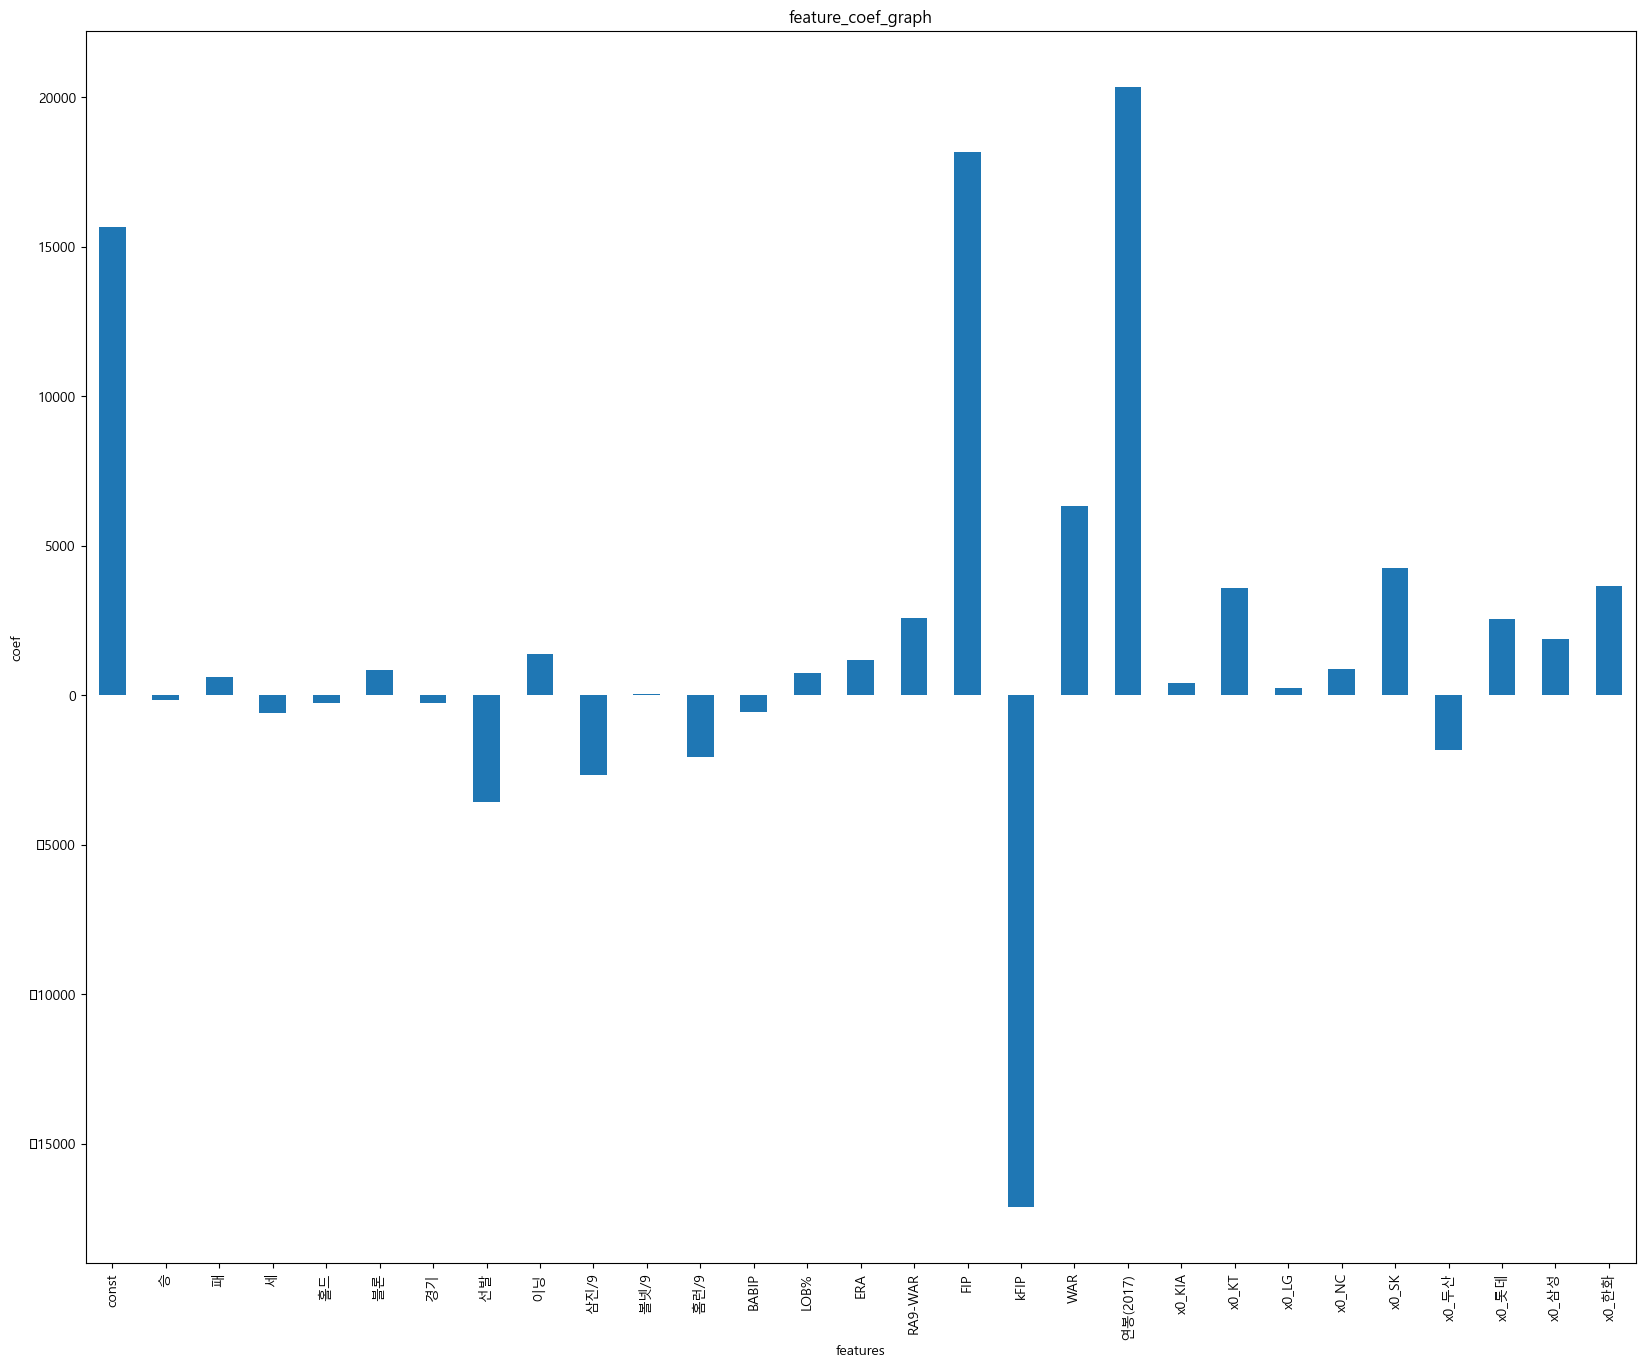

In [66]:
# 계수 시각화
# 회귀 계수를 시리즈로 변환
coefs = model.params.tolist()
coefs_se = pd.Series(coefs)

# 변수명을 리스트로 변환
x_labels = model.params.index.tolist()

ax = coefs_se.plot(kind = "bar")
ax.set_title("feature_coef_graph")
ax.set_xlabel("features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:342: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


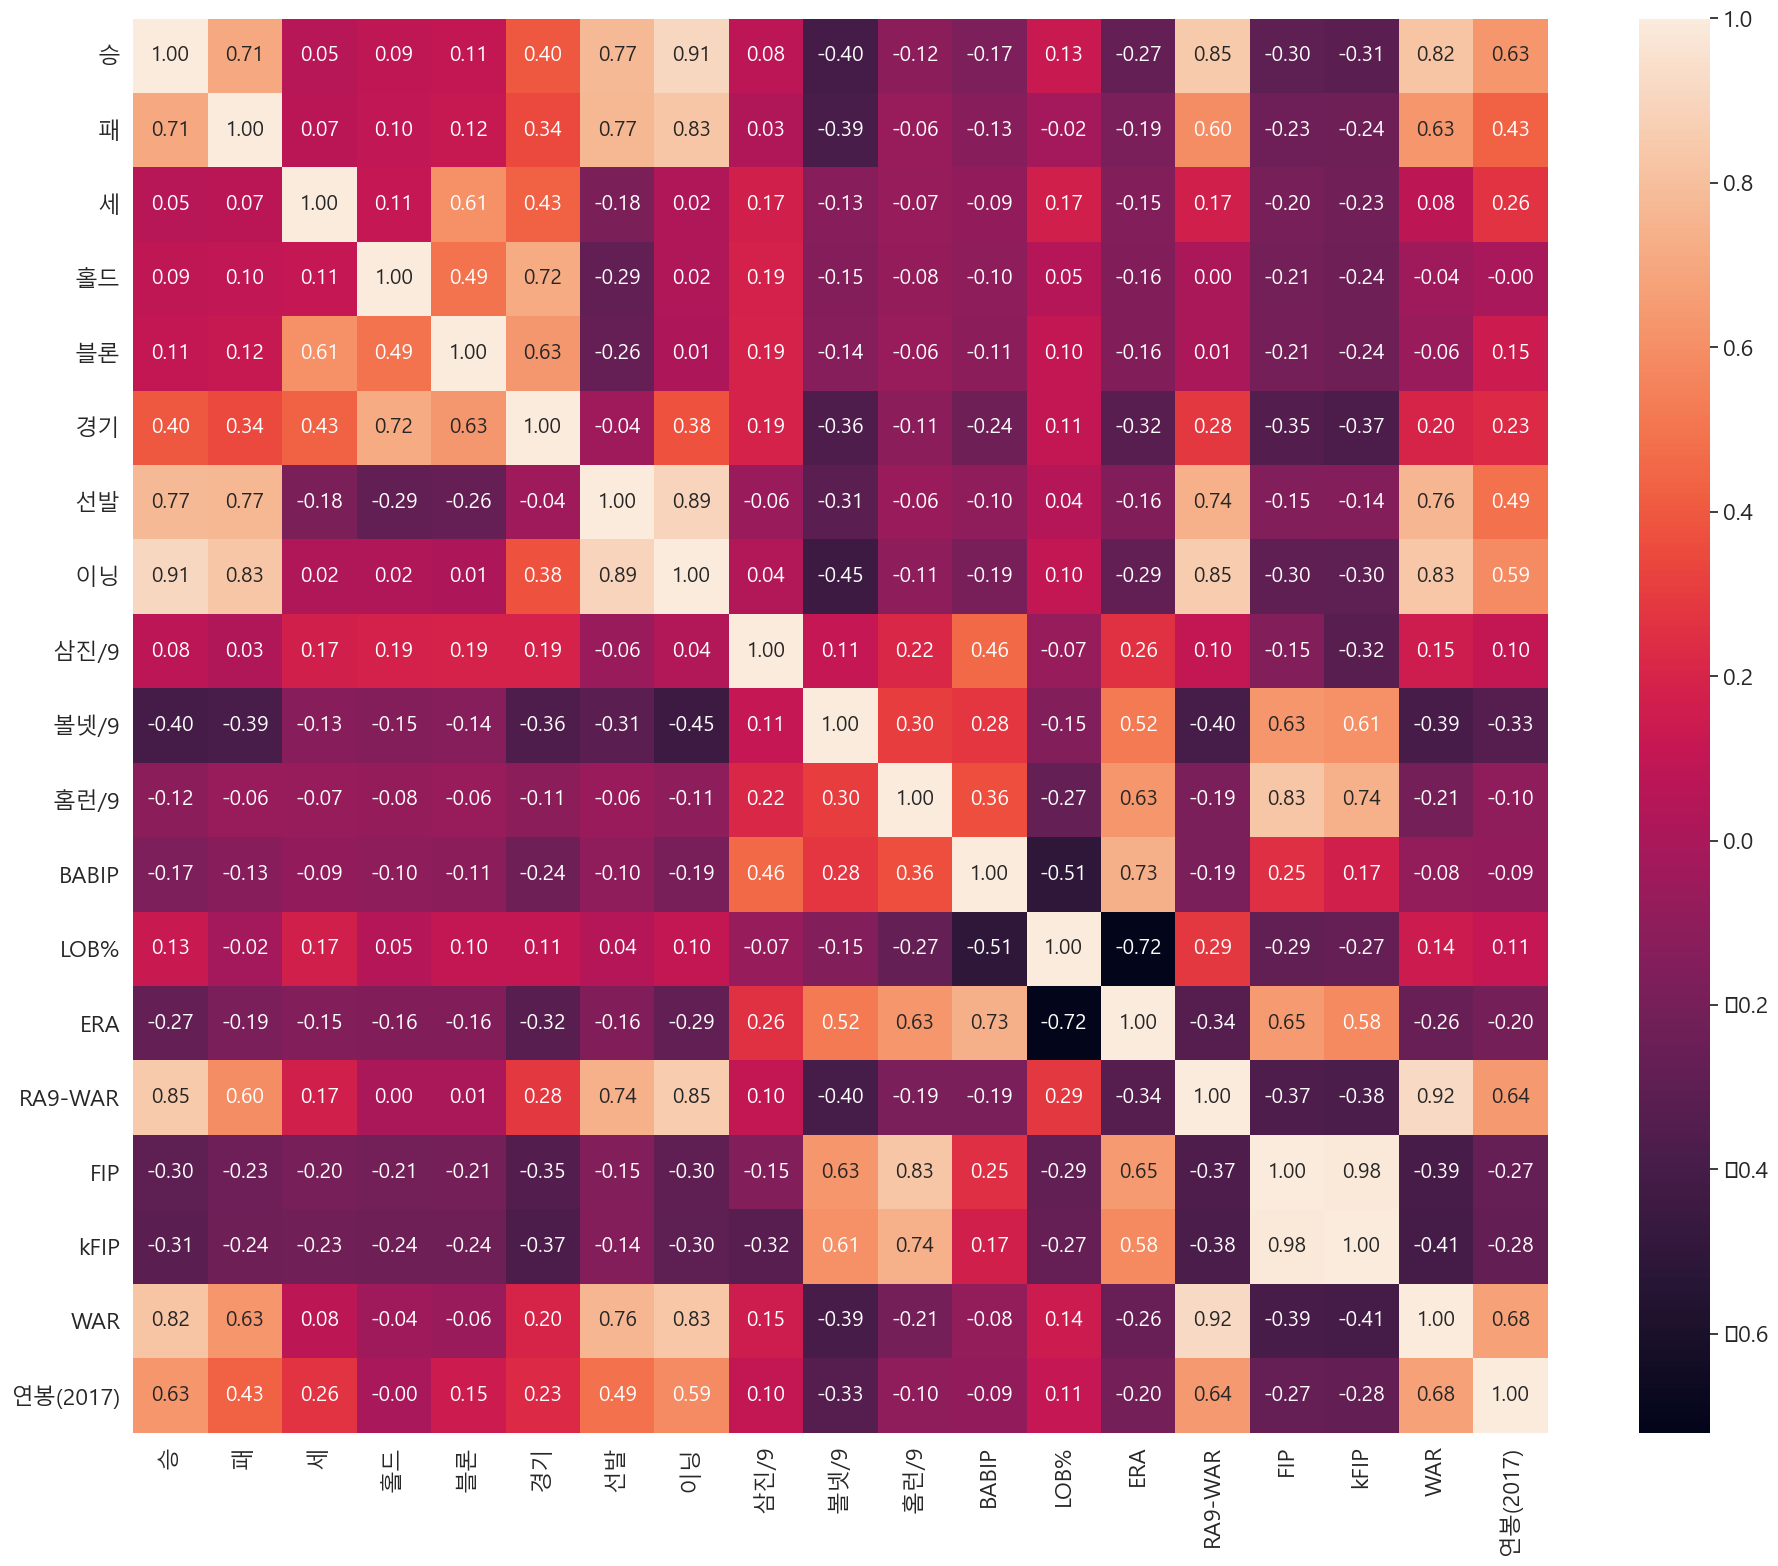

In [67]:
# 피처들의 상관관계 시각화
corr = pich[scale_col].corr()
sns.set(font_scale = 1.5, font = "Malgun Gothic")
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f",
                annot_kws = {"size" : 15}, yticklabels = scale_col, xticklabels = scale_col)

plt.tight_layout()
plt.show()

In [68]:
# 피처마다 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["feature"] = x.columns
vif.round(1)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.9,승
2,5.7,패
3,2.8,세
4,4.0,홀드
5,3.0,블론
6,15.6,경기
7,36.5,선발
8,57.4,이닝
9,74.3,삼진/9


#### 변수제거1

- 제거된 변수 : 볼넷/9 (p-value가 너무 높아서 얘부터 제거)

In [72]:
new_x = x.drop("볼넷/9", axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     79.09
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           8.51e-53
Time:                        14:09:45   Log-Likelihood:                -1210.4
No. Observations:                 121   AIC:                             2475.
Df Residuals:                      94   BIC:                             2550.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.565e+04    503.047     31.102      0.000    1.46e+04    1.66e+04
승           -158.9338   1641.666     -0.097      0.923   -3418.499    3100.632
패            622.3909   1297.225      0.480      0.632   -1953.279    3198.061
세           -586.1615    929.878     -0.630      0.530   -2432.456    1260.133
홀드          -257.6751   1093.920     -0.236      0.814   -2429.678    1914.328
블론           844.0857    950.342      0.888      0.377   -1042.841    2731.013
경기          -267.1364   2167.658     -0.123      0.902   -4571.073    4036.800
선발         -3586.6802   3328.260     -1.078      0.284   -1.02e+04    3021.658
이닝          1386.0079   4166.151      0.333      0.740   -6885.983    9657.999
삼진/9       -2697.3711   3475.175     -0.776      0.440   -9597.412    4202.670
홈런/9       -2159.2553   2313.156     -0.933      0.353   -6752.080    2433.570
BABIP       -571.5939    950.881     -0.601      0.549   -2459.591    1316.403
LOB%         739.5812   1151.695      0.642      0.522   -1547.137    3026.299
ERA         1176.5972   1544.995      0.762      0.448   -1891.026    4244.221
RA9-WAR     2585.2820   1956.529      1.321      0.190   -1299.453    6470.017
FIP         1.863e+04   2.25e+04      0.829      0.409    -2.6e+04    6.32e+04
kFIP       -1.753e+04   2.25e+04     -0.779      0.438   -6.22e+04    2.72e+04
WAR         6313.9166   1753.912      3.600      0.001    2831.483    9796.350
연봉(2017)    2.034e+04    859.600     23.664      0.000    1.86e+04     2.2e+04
x0_KIA       416.3768   1714.552      0.243      0.809   -2987.907    3820.661
x0_KT       3576.8217   1544.965      2.315      0.023     509.257    6644.387
x0_LG        254.4071   1586.196      0.160      0.873   -2895.022    3403.836
x0_NC        860.5924   1970.159      0.437      0.663   -3051.205    4772.390
x0_SK       4268.6257   1623.521      2.629      0.010    1045.086    7492.165
x0_두산      -1827.7598   1893.378     -0.965      0.337   -5587.106    1931.586
x0_롯데       2563.2567   1752.299      1.463      0.147    -915.974    6042.488
x0_삼성       1875.4142   1785.063      1.051      0.296   -1668.871    5419.699
x0_한화       3658.2746   1593.858      2.295      0.024     493.632    6822.918
==============================================================================
Omnibus:                       73.147   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.728
Skew:                           1.907   Prob(JB):                    2.83e-117
Kurtosis:                      12.587   Cond. No.                     2.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-30. This might indicate

In [73]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,8.9,승
2,5.5,패
3,2.8,세
4,3.9,홀드
5,3.0,블론
6,15.5,경기
7,36.4,선발
8,57.1,이닝
9,39.7,삼진/9


#### 변수 제거2

- 제거된 변수 : 볼넷/9, 승(p-value가 두번째로 높은애)

In [74]:
new_x = new_x.drop("승", axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     83.12
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           9.25e-54
Time:                        14:14:46   Log-Likelihood:                -1210.4
No. Observations:                 121   AIC:                             2473.
Df Residuals:                      95   BIC:                             2545.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.564e+04    500.286     31.272      0.000    1.47e+04    1.66e+04
패            618.3743   1289.783      0.479      0.633   -1942.169    3178.918
세           -589.2413    924.476     -0.637      0.525   -2424.557    1246.075
홀드          -245.7926   1081.330     -0.227      0.821   -2392.504    1900.919
블론           825.8941    926.711      0.891      0.375   -1013.859    2665.647
경기          -288.2857   2145.349     -0.134      0.893   -4547.341    3970.770
선발         -3588.5624   3310.805     -1.084      0.281   -1.02e+04    2984.217
이닝          1312.0277   4074.061      0.322      0.748   -6776.006    9400.061
삼진/9       -2704.7258   3456.182     -0.783      0.436   -9566.115    4156.663
홈런/9       -2168.3986   2299.145     -0.943      0.348   -6732.779    2395.982
BABIP       -570.5614    945.851     -0.603      0.548   -2448.313    1307.190
LOB%         734.2812   1144.380      0.642      0.523   -1537.600    3006.162
ERA         1167.1359   1533.841      0.761      0.449   -1877.923    4212.194
RA9-WAR     2539.3065   1888.099      1.345      0.182   -1209.044    6287.657
FIP         1.869e+04   2.23e+04      0.837      0.405   -2.57e+04     6.3e+04
kFIP       -1.759e+04   2.24e+04     -0.786      0.434    -6.2e+04    2.69e+04
WAR         6289.9501   1727.277      3.642      0.000    2860.872    9719.028
연봉(2017)    2.034e+04    854.882     23.796      0.000    1.86e+04     2.2e+04
x0_KIA       415.2899   1705.553      0.243      0.808   -2970.661    3801.241
x0_KT       3600.8955   1516.852      2.374      0.020     589.564    6612.227
x0_LG        258.7258   1577.280      0.164      0.870   -2872.570    3390.022
x0_NC        858.5836   1959.752      0.438      0.662   -3032.015    4749.183
x0_SK       4280.2085   1610.643      2.657      0.009    1082.678    7477.739
x0_두산      -1839.7144   1879.470     -0.979      0.330   -5570.935    1891.506
x0_롯데       2528.5983   1706.373      1.482      0.142    -858.981    5916.177
x0_삼성       1877.8421   1775.557      1.058      0.293   -1647.084    5402.768
x0_한화       3664.4620   1584.251      2.313      0.023     519.326    6809.598
==============================================================================
Omnibus:                       73.360   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.893
Skew:                           1.913   Prob(JB):                    5.81e-118
Kurtosis:                      12.615   Cond. No.                     2.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

- 승을 제거하니까 AIC, BIC 조금 떨어짐

In [75]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,5.5,패
2,2.8,세
3,3.9,홀드
4,2.9,블론
5,15.3,경기
6,36.4,선발
7,55.2,이닝
8,39.7,삼진/9
9,17.6,홈런/9


#### 변수제거3

- 제거된 변수 : 볼넷/9, 승, 경기

In [76]:
new_x = new_x.drop("경기", axis = 1)
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     87.48
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           9.85e-55
Time:                        14:17:13   Log-Likelihood:                -1210.4
No. Observations:                 121   AIC:                             2471.
Df Residuals:                      96   BIC:                             2541.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.564e+04    497.698     31.433      0.000    1.47e+04    1.66e+04
패            621.7748   1282.923      0.485      0.629   -1924.807    3168.356
세           -638.0945    845.632     -0.755      0.452   -2316.661    1040.472
홀드          -320.7635    921.537     -0.348      0.729   -2150.000    1508.473
블론           810.5556    914.939      0.886      0.378   -1005.583    2626.694
선발         -3281.9752   2386.862     -1.375      0.172   -8019.860    1455.909
이닝           863.8329   2327.534      0.371      0.711   -3756.286    5483.951
삼진/9       -2744.6850   3425.710     -0.801      0.425   -9544.666    4055.296
홈런/9       -2200.0271   2275.339     -0.967      0.336   -6716.539    2316.484
BABIP       -568.2913    940.851     -0.604      0.547   -2435.866    1299.283
LOB%         759.6922   1122.861      0.677      0.500   -1469.168    2988.553
ERA         1199.7973   1506.695      0.796      0.428   -1790.969    4190.563
RA9-WAR     2587.0816   1844.816      1.402      0.164   -1074.849    6249.012
FIP         1.892e+04   2.22e+04      0.854      0.395   -2.51e+04    6.29e+04
kFIP       -1.781e+04   2.22e+04     -0.802      0.425   -6.19e+04    2.63e+04
WAR         6320.2986   1703.668      3.710      0.000    2938.545    9702.052
연봉(2017)    2.037e+04    827.570     24.614      0.000    1.87e+04     2.2e+04
x0_KIA       428.2945   1694.074      0.253      0.801   -2934.416    3791.005
x0_KT       3615.5859   1505.150      2.402      0.018     627.887    6603.284
x0_LG        237.2587   1561.123      0.152      0.880   -2861.546    3336.063
x0_NC        854.1885   1949.432      0.438      0.662   -3015.403    4723.780
x0_SK       4291.2849   1600.285      2.682      0.009    1114.745    7467.825
x0_두산      -1843.4576   1869.628     -0.986      0.327   -5554.640    1867.725
x0_롯데       2503.1516   1687.138      1.484      0.141    -845.790    5852.093
x0_삼성       1882.2088   1766.157      1.066      0.289   -1623.585    5388.002
x0_한화       3675.7333   1573.917      2.335      0.022     551.532    6799.935
==============================================================================
Omnibus:                       73.355   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              539.890
Skew:                           1.913   Prob(JB):                    5.81e-118
Kurtosis:                      12.615   Cond. No.                     2.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,feature
0,0.0,const
1,5.5,패
2,2.4,세
3,2.9,홀드
4,2.8,블론
5,19.1,선발
6,18.2,이닝
7,39.4,삼진/9
8,17.4,홈런/9
9,3.0,BABIP


### 아무튼 분석결과 26

- 사용 변수 : 선발, WAR, 연봉(2017)
- 강사님이 돌린거랑 random_state가 다름(221128)
- 직접 26번까지 노가다 하면 됨

In [80]:
new_x = x[["WAR", "연봉(2017)"]]
new_x = sm.add_constant(new_x)
model = sm.OLS(y_train.reset_index(drop = True), new_x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1053.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           5.62e-76
Time:                        14:23:14   Log-Likelihood:                -1222.1
No. Observations:                 121   AIC:                             2450.
Df Residuals:                     118   BIC:                             2458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.756e+04    542.040     32.403      0.000    1.65e+04    1.86e+04
WAR         6140.8495    702.340      8.743      0.000    4750.025    7531.674
연봉(2017)    2.052e+04    702.340     29.216      0.000    1.91e+04    2.19e+04
==============================================================================
Omnibus:                       89.277   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.598
Skew:                           2.322   Prob(JB):                    2.81e-206
Kurtosis:                      15.892   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.7,WAR
2,1.7,연봉(2017)


## 분석결과

In [83]:
fin_train = scaled_train[["WAR", "연봉(2017)"]]
fin_test = scaled_test[["WAR", "연봉(2017)"]]

In [84]:
fin_lr = LinearRegression()
fin_lr.fit(fin_train, y_train)

LinearRegression()

In [85]:
fin_lr.score(fin_test, y_test)

0.8557489837736668

In [86]:
fin_pred = fin_lr.predict(fin_test)
fin_mae = mean_absolute_error(y_test, fin_pred)
fin_mae

7457.807541999418

## 최종 시각화

### 전체 데이터에 대해서 예측

In [87]:
result_df = pich[scale_col]

In [88]:
result_df = pich_ss.transform(result_df)

In [89]:
result_df = pd.DataFrame(result_df, columns = scale_col)

In [90]:
result_df = result_df[["WAR", "연봉(2017)"]]

In [91]:
result_df.head()

,WAR,연봉(2017)
0,4.776725,3.072582
1,4.343742,1.526984
2,3.990941,5.942976
3,3.181104,3.734980
4,2.980649,3.072582


In [92]:
vis_pred = fin_lr.predict(result_df)

In [94]:
vis_df = pd.read_csv("./data/picher_stats_2017.csv")

In [95]:
vis_df = pd.concat([vis_df, pd.DataFrame(vis_pred, columns = ["예측연봉"])], axis = 1)

In [96]:
vis_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,109945.369218
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,75571.229740
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,164019.758058
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,113739.153672
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,98915.936610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100,5352.292009
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,723.063732
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000,11821.539368
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900,-492.175623


In [97]:
# 재계약하여 연봉이 변화한 선수만 대상으로 시각화
vis_df = vis_df[vis_df["연봉(2018)"] != vis_df["연봉(2017)"]]
vis_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),예측연봉
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,109945.369218
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,75571.229740
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,164019.758058
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,98915.936610
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,51441.928915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100,5352.292009
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,723.063732
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000,11821.539368
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900,-492.175623


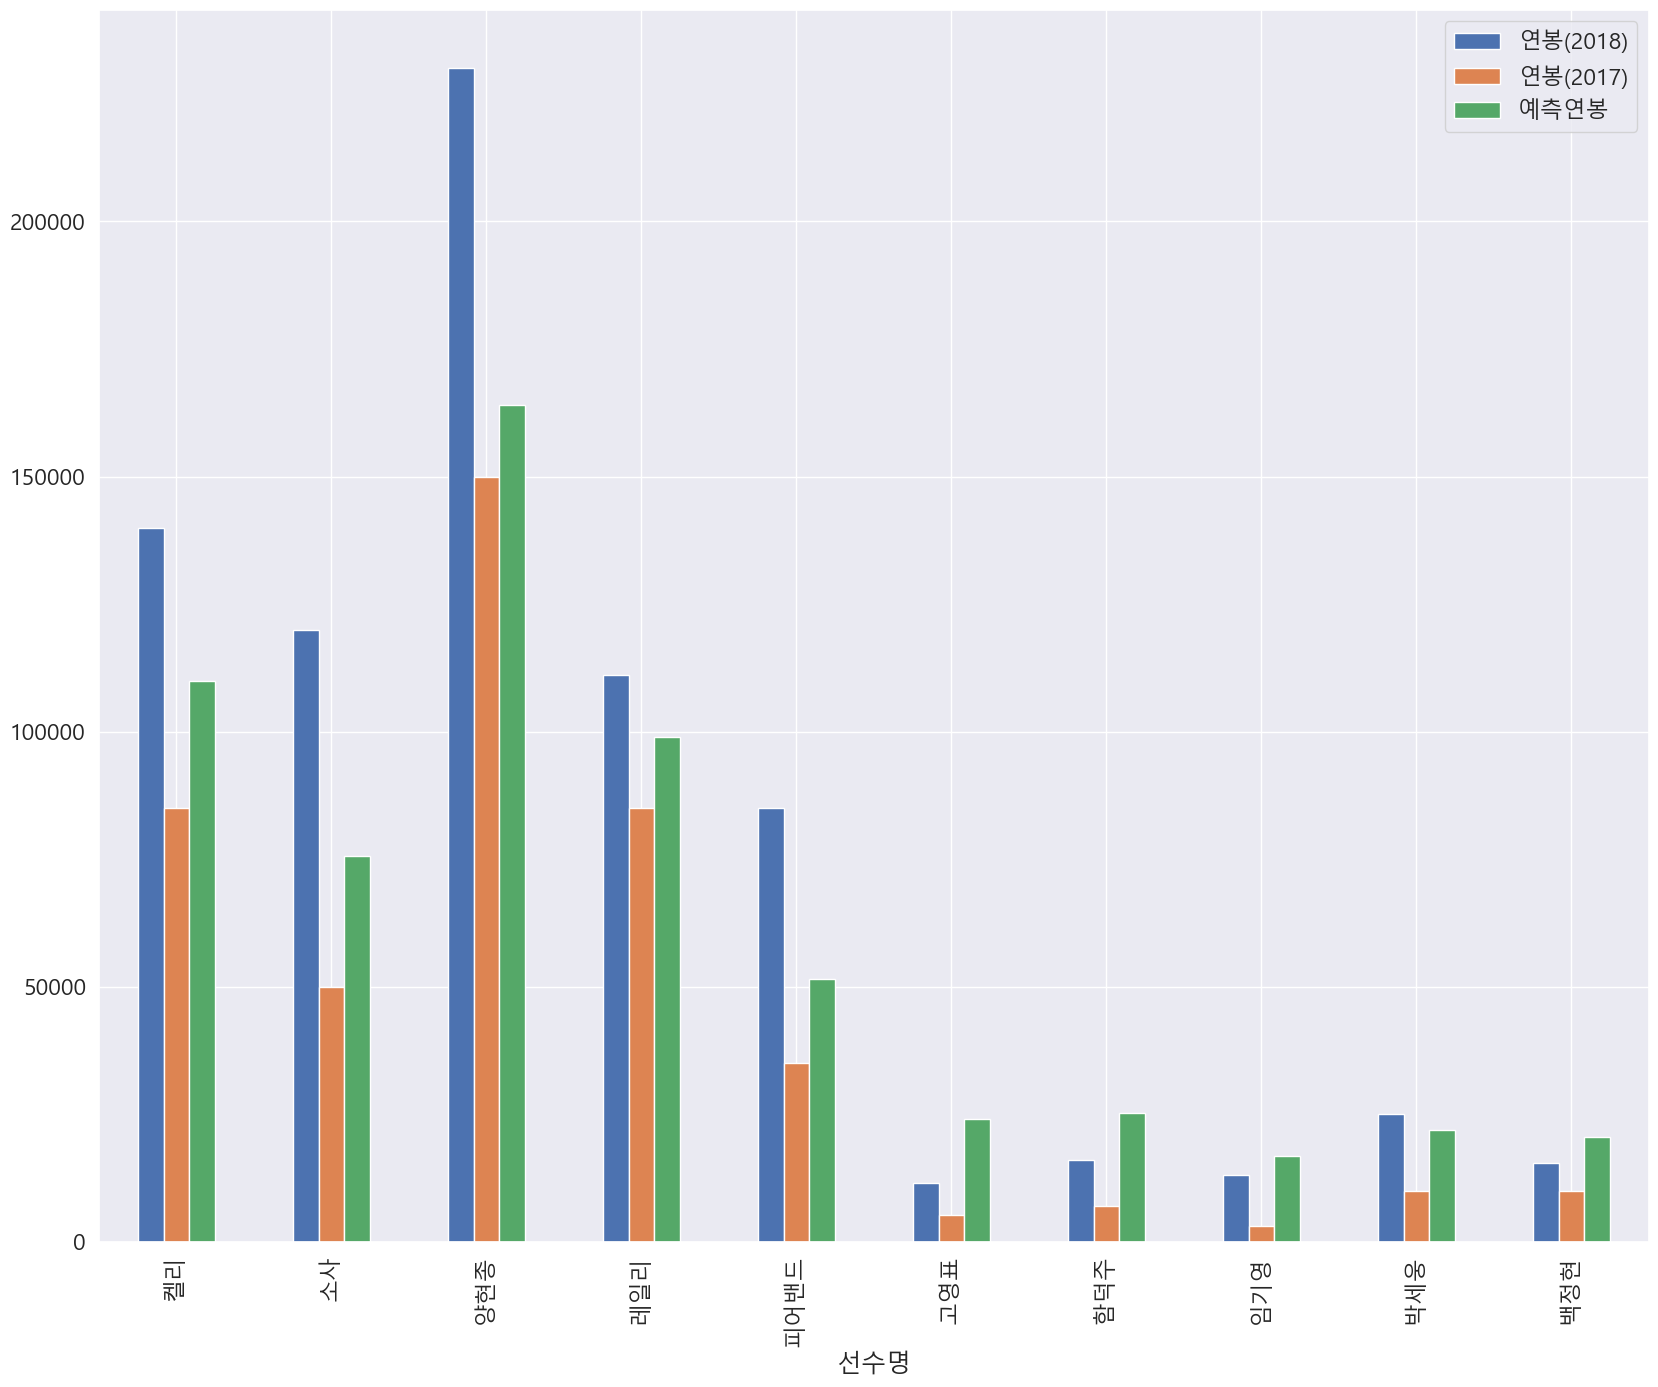

In [100]:
vis_df.head(10).plot(x = "선수명", y = ["연봉(2018)", "연봉(2017)", "예측연봉"], kind = "bar")
plt.show()